In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
print(len(X))
y = 4 + 3 * X + np.random.randn(100,1)
print (len(y))

import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

100
100


<Figure size 640x480 with 1 Axes>

In [11]:
# computing \Theta by the Normal equation

X_b = np.c_[np.ones((100,1)), X] 
# add x0 =1 to each instance which is the bias
# why are we adding bias to all ?
print(X_b[1].shape)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

# ideal values are 4 and 3 but its close but the noise made
# it impossible

(2,)
[[3.89335721]
 [3.03985937]]


In [8]:
# making predictions with theta new

X_new = np.array([[0],[2]])
# what is X_new
# is it randomly taken test value ?

print(X_new)
print(np.ones((2,1)))
X_new_b = np.c_[np.ones((2,1)), X_new]
# why do we add bias once more

print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1.]
 [1.]]
[[1. 0.]
 [1. 2.]]
[[3.89335721]
 [9.97307595]]


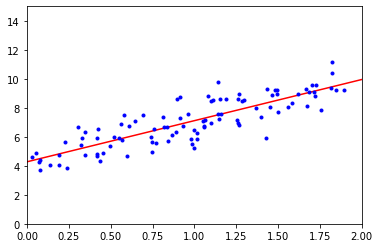

In [13]:
# plotting the predictions
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

[4.27647502] [[2.83859985]]


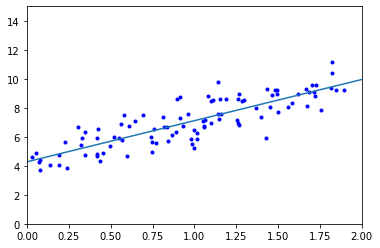

In [17]:
# equivalent code in scikitlearn for linear regression
from sklearn.linear_model import LinearRegression
# based on moore penrose inverse

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
y_new = lin_reg.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new,y_new)
plt.axis([0,2,0,15])
plt.show()

### Batch gradient descent

In [18]:
# Exploring gradient descent

eta =0.1 # learning rate
n_iterations =1000
m =1000

theta = np.random.randn(2,1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients

In [19]:
theta
# expected 4 and 3

array([[4.26004224],
       [2.85342362]])

[[0.74587926]
 [3.99644817]] [[0.66732668]
 [3.75428823]] [[1.13864217]
 [5.20724784]]
[[0.74587926]
 [1.62528445]] [[0.66732668]
 [1.54348078]] [[1.13864217]
 [2.03430283]]


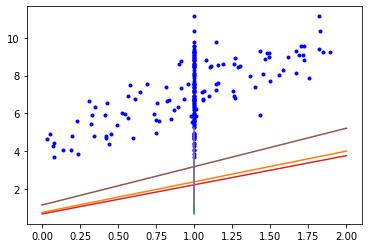

In [30]:
# trying using different learning rates

eta1 = 0.1
eta2 = 0.02
eta3 = 0.5

theta = np.random.randn(2,1)
#print(X_b)

plt.plot(X_b, y, "b.")

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta1 = theta - eta1 * gradients
    theta2 = theta - eta2 * gradients
    theta3 = theta - eta3 * gradients
    
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred1 = X_new_b.dot(theta1)
y_pred2 = X_new_b.dot(theta2)
y_pred3 = X_new_b.dot(theta3)
print(y_pred1, y_pred2, y_pred3)
print(theta1,theta2,theta3)
    

plt.plot(X_new_b, y_pred1)
plt.plot(X_new_b, y_pred2)
plt.plot(X_new_b, y_pred3)

plt.show()

### Plotting batch gradient descent

In [32]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y,"b.")
    n_iterations =1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0,2,0,15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=16)
        
    print("Theta for {}: ".format(eta), theta)
        

Theta for 0.02:  [[3.89293872]
 [3.04023066]]
Theta for 0.1:  [[3.89335721]
 [3.03985937]]
Theta for 0.5:  [[-6.14952559e+25]
 [-6.93138359e+25]]


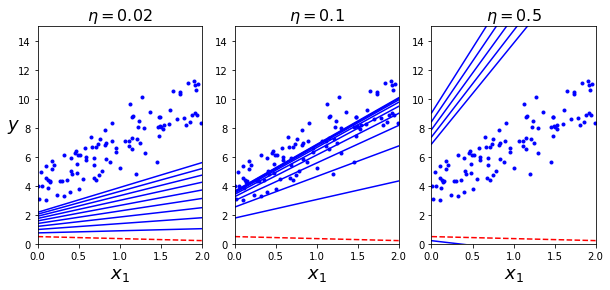

In [33]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

In [33]:
print(theta_path_bgd)

[array([[1.83228097],
       [1.31271757]]), array([[2.6182189 ],
       [2.15513242]]), array([[3.08294564],
       [2.64217338]]), array([[3.35989702],
       [2.92174257]]), array([[3.52702419],
       [3.08023547]]), array([[3.62986635],
       [3.16811788]]), array([[3.69502879],
       [3.21486705]]), array([[3.73805639],
       [3.23769959]]), array([[3.76803282],
       [3.24667004]]), array([[3.79026736],
       [3.2476492 ]]), array([[3.80786435],
       [3.24406396]]), array([[3.82264001],
       [3.23791364]]), array([[3.83565804],
       [3.2303637 ]]), array([[3.84754249],
       [3.22209255]]), array([[3.85866049],
       [3.21349414]]), array([[3.86922906],
       [3.20479631]]), array([[3.87937744],
       [3.19612991]]), array([[3.88918355],
       [3.18756922]]), array([[3.89869526],
       [3.17915547]]), array([[3.90794284],
       [3.17091071]]), array([[3.91694621],
       [3.16284576]]), array([[3.9257192 ],
       [3.15496498]]), array([[3.93427203],
       [3.

### Stochastic Gradient Descent

In [6]:
n_epochs= 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

# t is given by epoch * m + m(i)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.88851302]
 [3.04932794]]


In [7]:
theta_path_sgd =[]
m = len(X_b)
np.random.seed(42)

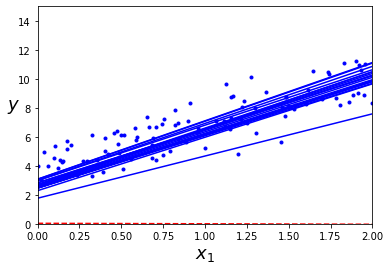

In [23]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i >0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index +1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [25]:
# performing linear regression with scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.89926409] [3.07849444]


### Mini-batch gradient descent

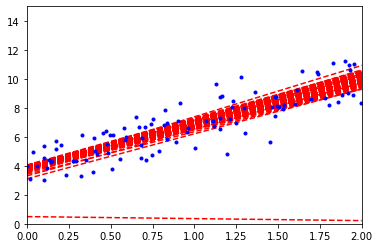

In [30]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200,1000
def learning_schedule(t):
    return t0 / (t+t1)
t =0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m , minibatch_size):
        t += 1
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r--")
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/ minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [31]:
print(theta)

[[3.79252045]
 [2.91792235]]


In [34]:
# utilising theta_path which we calculated for all three
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

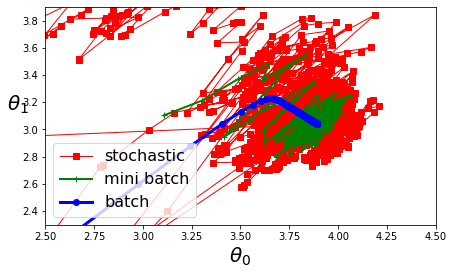

In [39]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r-s",linewidth=1, label="stochastic" )
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], "g-+", linewidth=2, label="mini batch")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "b-o", linewidth=3, label="batch")
plt.legend(fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()